# EDA and Preprocessing

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Ask_A_Manager_Salary_Survey_2021_Responses.xlsx')
data.head(1)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White


In [3]:
data.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [4]:
rename_dict = { 'Timestamp':'time',
               'How old are you?':'age',
               'What industry do you work in?':'industry',
               'Job title':'job',
               'If your job title needs additional context, please clarify here:':'job_context',
               'What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)':'annual_income',
               'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':'compensation',
               'Please indicate the currency':'currency',
               'If "Other," please indicate the currency here: ':'currency_other',
               'If your income needs additional context, please provide it here:':'income_context',
               'What country do you work in?':'country',
               'If you\'re in the U.S., what state do you work in?':'usa_state',
               'What city do you work in?':'city',
               'How many years of professional work experience do you have overall?':'overall_experience',
               'How many years of professional work experience do you have in your field?':'field_experience',
               'What is your highest level of education completed?':'education',
               'What is your gender?':'gender',
               'What is your race? (Choose all that apply.)':'race',
               }
data.rename(columns=rename_dict, inplace=True)
data.head(1)

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,country,usa_state,city,overall_experience,field_experience,education,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27849 entries, 0 to 27848
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                27849 non-null  datetime64[ns]
 1   age                 27849 non-null  object        
 2   industry            27779 non-null  object        
 3   job                 27849 non-null  object        
 4   job_context         7204 non-null   object        
 5   annual_income       27849 non-null  int64         
 6   compensation        20634 non-null  float64       
 7   currency            27849 non-null  object        
 8   currency_other      191 non-null    object        
 9   income_context      3026 non-null   object        
 10  country             27849 non-null  object        
 11  usa_state           22895 non-null  object        
 12  city                27774 non-null  object        
 13  overall_experience  27849 non-null  object    

<Axes: >

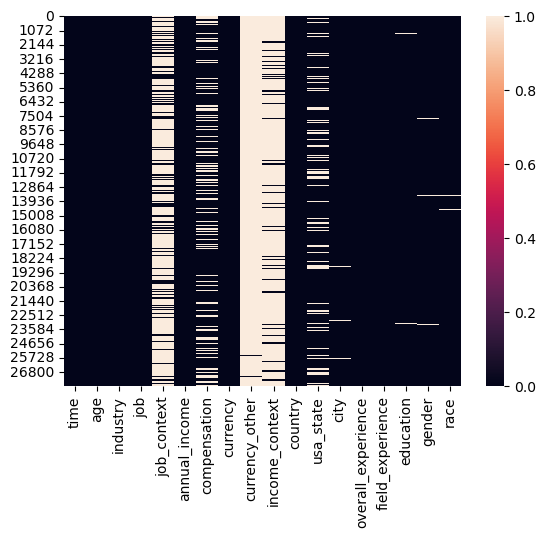

In [6]:
sns.heatmap(data=data.isna())

In [7]:
data.nunique()

time                  27844
age                       7
industry               1207
job                   14248
job_context            6947
annual_income          3628
compensation            841
currency                 11
currency_other          114
income_context         2963
country                 367
usa_state               131
city                   4789
overall_experience        8
field_experience          8
education                 6
gender                    5
race                     48
dtype: int64

## Organizing data

### currency
There is a lot of noise in *currency_other*, we need to clean it and add to our main column *currency*

In [8]:
data['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [9]:
data['currency_other'].unique()

array([nan, 'INR', 'Peso Argentino', 76302.34,
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       0, 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', 55000,
       'AUD & NZD are not the same currency...', 'US Dollar', 'Canadian ',
       'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 'Philippine Pes

In [10]:
nan = None
wrong_place = ['I work for an online state university, managing admissions data. Not direct tech support. ',
               'My bonus is based on performance up to 10% of salary',
               'Base plus Commission ',
               'Additonal = Bonus plus stock',
               'Overtime (about 5 hours a week) and bonus',
               'AUD & NZD are not the same currency...',
               'Stock ',
               "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
               '6000 in stock grants annually',
               'Many non-salary benefits - travel, free healthcare for self, very low for family, non-taxable housing allowance ',
               'Equity',
               'It’s marketed as £22000 but we get paid pro-rats, so no pay for the school holidays.',
               'additional compensation is for overtime (i am paid hourly) so it varies. i have included an estimate',
                'Option to get 2x or 1.5x if taking on a weekend day in the summer',
                'up to 12% annual bonus',
               'Rupees',
              ]
rename_currencies = {
                'American Dollars':'USD',
                'Peso Argentino':'ARS',
                0:nan,
                'Na ':nan,
                'BR$':'BRL',
                'canadian':'CAD',
                'Indian rupees':'INR', 
                'BRL (R$)':'BRL', 
                'Mexican pesos':'MXN',
                'RSU / equity':'RSU',
                'PLN (Polish zloty)':'PLN',
                'czech crowns':'CZK',
                'Norwegian kroner (NOK)':'NOK',
                'US Dollar':'USD',
                'Canadian ':'CAD',
                'NIS (new Israeli shekel)':'NIS',
                '-':nan,
                'RMB (chinese yuan)':'RMB',
                'Taiwanese dollars':'TWD',
                'Philippine Peso':'PHP', 
                'KRW (Korean Won)':'KRW', 
                'ILS (Shekel)':'ILS',
                'China RMB':'RMB',
                'AUD Australian ':'AUD/NZD', 
                'Polish Złoty':'PLN',
                'Philippine peso (PHP)':'PHP',
                'Australian Dollars ':'AUD/NZD',
                'Argentinian peso (ARS)':'ARS', 
                'Israeli Shekels':'ILS',
                'PhP (Philippine Peso)':'PHP',
                'Converted mine into USD for your easyness':'USD',
                'Argentine Peso':'ARS', 
                'Philippine Pesos':'PHP',
                'Rs':'INR', 
                'INR (Indian Rupee)':'INR', 
                'Danish Kroner':'DKK',
                'Korean Won ': 'KRW',
                'Euro':'EUR',
                'Mexican Pesos':'MXN',
                'THAI  BAHT':'THB',
                'Thai Baht ':'THB', 
                'na':nan, 
                'Canadian':'CAD', 
                'N/a':nan,
                'None':nan,
                'croatian kuna':'HRK', 
                'PLN (Zwoty)':'PLN',
                'Singapore Dollara':'SGD',
                'AUD' : 'AUD/NZD'

                }

In [11]:
for pos, elem in enumerate(data['currency_other']):
    if elem in rename_currencies.keys():
        data.loc[pos, 'currency_other'] = rename_currencies[elem]

In [12]:
mask = []
for elem in data['currency_other']:
    mask.append(elem in wrong_place)
data[mask]

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,country,usa_state,city,overall_experience,field_experience,education,gender,race
766,2021-04-27 11:14:39.158,25-34,Recruitment or HR,Lead Payroll & Benefits Specialist,NaN,64000,6400.0,USD,My bonus is based on performance up to 10% of ...,NaN,US,New York,Schenectady,5-7 years,5-7 years,College degree,Woman,White
776,2021-04-27 11:14:45.141,45-54,Education (Higher Education),Sr Technical Support Rep,I,53000,0.0,USD,"I work for an online state university, managin...","I have excellent health benefits, time off, si...",USA,New Jersey,Trenton,8 - 10 years,2 - 4 years,Master's degree,Woman,White
3124,2021-04-27 11:59:25.947,25-34,Sales,Territory Manager,Software sales for automotive industry,33000,0.0,USD,Base plus Commission,Commision checks every month that vary based o...,USA,Minnesota,Duluth,5-7 years,2 - 4 years,College degree,Man,White
7233,2021-04-27 14:35:26.533,45-54,Computing or Tech,Content specialist,NaN,62000,17000.0,EUR,Additonal = Bonus plus stock,NaN,Ireland,NaN,"Small country, prefer not to say!",31 - 40 years,8 - 10 years,College degree,Woman,White
7915,2021-04-27 15:23:13.744,25-34,Computing or Tech,Executive Assiatant II,Grade 6,86000,20000.0,USD,Overtime (about 5 hours a week) and bonus,NaN,US,Massachusetts,"HQ us in Cambridge, Ma but moving to the subur...",5-7 years,2 - 4 years,College degree,Woman,White
8004,2021-04-27 15:28:25.088,35-44,Computing or Tech,Senior Executive Assistant,NaN,115000,NaN,USD,Stock,NaN,USA,Washington,Seattle,8 - 10 years,8 - 10 years,Some college,Woman,Native American or Alaska Native
9384,2021-04-27 17:50:21.168,25-34,Engineering or Manufacturing,Senior Analyst,NaN,108000,0.0,AUD/NZD,AUD & NZD are not the same currency...,NaN,Australia,NaN,Melbourne,5-7 years,2 - 4 years,College degree,Woman,White
10667,2021-04-27 21:47:39.285,35-44,Computing or Tech,software engineer,NaN,120000,NaN,AUD/NZD,"AUD and NZD aren't the same currency, and have...",Before tax,Australia,NaN,Melbourne,8 - 10 years,8 - 10 years,College degree,Man,White
11734,2021-04-28 04:27:20.043,45-54,Transport or Logistics,HR Manager,NaN,104917,17000.0,USD,6000 in stock grants annually,NaN,US,Kansas,Tooeka,21 - 30 years,11 - 20 years,Master's degree,Woman,White
14331,2021-04-28 14:25:39.873,45-54,Military,San Diego,Officer,125000,0.0,USD,"Many non-salary benefits - travel, free health...",You are in a contract and can’t just quit.,US,"California, Oregon",San Diego,21 - 30 years,11 - 20 years,High School,Woman,White


In [13]:
# just in the wrong place
for ind in [766,
            7233,
            7915,
            15065,
            14915,
            16139,
            25795,
            27131,
           ]:
    data.loc[ind, 'income_context'] =  data.loc[ind, 'currency_other']
    data.loc[ind, 'currency_other'] = nan

# offtop
for ind in [776,
            3124,
            8004,
            9384,
            10667,
            11734,
            14331,
           ]:
    data.loc[ind, 'currency_other'] = nan
data.loc[27800, 'currency_other'] = 'INR'

In [14]:
wrong = [76302.34,0,55000,47000,5,]
mask = []
for elem in data['currency_other']:
    mask.append(elem in wrong)
data[mask]

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,country,usa_state,city,overall_experience,field_experience,education,gender,race
752,2021-04-27 11:14:29.470,45-54,Public Library (technically City Govt.?),Administrative Librarian,I run a branch library and am responsible for ...,76302,0.0,USD,76302.34,NaN,USA,Arizona,Glendale,21 - 30 years,21 - 30 years,Master's degree,Woman,White
9284,2021-04-27 17:36:25.691,45-54,Business or Consulting,Personal Executive Assistant,NaN,55,NaN,USD,55000,NaN,US,Michigan,Bloomfield Hills,21 - 30 years,11 - 20 years,College degree,Woman,White
26531,2021-07-06 18:49:41.205,25-34,Nonprofits,Districtwide Program Coordinator,NaN,47000,NaN,USD,47000,NaN,United States,Michigan,Decatur,8 - 10 years,8 - 10 years,Master's degree,Woman,White
27642,2022-01-27 14:13:04.563,18-24,Media & Digital,homie,NaN,56,5.0,USD,5,5,us,Alabama,dino,5-7 years,1 year or less,College degree,Man,White


In [15]:
data.loc[9284, 'annual_income'] = 55000
for pos, elem in enumerate(data['currency_other']):
    if elem in wrong:
        data.loc[pos,'currency_other'] = nan


In [16]:
data['currency_other'].astype('string').unique()

<StringArray>
[     <NA>,     'INR',     'ARS',     'MYR',     'CHF',     'KWD',     'NOK',
     'USD',     'BRL',     'SEK',     'CAD',     'Dkk',     'EUR',     'COP',
     'TTD',     'MXN',     'CZK',     'GBP',     'DKK',     'Bdt',     'RSU',
     'ZAR',     'Php',     'PLN',     'TRY',     'CNY', 'ILS/NIS', 'AUD/NZD',
     'NIS',     'RMB',     'TWD',     'NZD',     'PHP',     'SGD',     'KRW',
     'Czk',     'THB',    'IDR ',     'Sgd',     'Nok',     'ILS',    'DKK ',
     'LKR',     'SAR',      'RM',     'IDR',     'Ils',     'NTD',     'dkk',
    'SGD ',     'HRK',     'NGN']
Length: 52, dtype: string

In [17]:
data['currency_other'] = data['currency_other'].astype('string').str.upper().str.strip()
data['currency_other'].unique()

<StringArray>
[     <NA>,     'INR',     'ARS',     'MYR',     'CHF',     'KWD',     'NOK',
     'USD',     'BRL',     'SEK',     'CAD',     'DKK',     'EUR',     'COP',
     'TTD',     'MXN',     'CZK',     'GBP',     'BDT',     'RSU',     'ZAR',
     'PHP',     'PLN',     'TRY',     'CNY', 'ILS/NIS', 'AUD/NZD',     'NIS',
     'RMB',     'TWD',     'NZD',     'SGD',     'KRW',     'THB',     'IDR',
     'ILS',     'LKR',     'SAR',      'RM',     'NTD',     'HRK',     'NGN']
Length: 42, dtype: string

In [18]:
for pos, elem in enumerate(data['currency']):
    if elem == 'Other':
        data.loc[pos, 'currency'] = data.loc[pos, 'currency_other']

In [19]:
data['currency'] = data['currency'].astype('string')

In [20]:
data['currency'].value_counts()

USD        23225
CAD         1660
GBP         1580
EUR          634
AUD/NZD      505
CHF           38
SEK           38
JPY           23
ZAR           15
INR           12
DKK           12
NOK           10
SGD           10
MYR            8
BRL            8
PLN            7
PHP            6
CZK            6
ARS            5
ILS            5
KRW            4
MXN            4
HKD            4
THB            4
CNY            2
IDR            2
NZD            2
NTD            2
RMB            2
BDT            1
HRK            1
RM             1
SAR            1
LKR            1
TWD            1
TTD            1
TRY            1
ILS/NIS        1
NIS            1
NGN            1
Name: currency, dtype: Int64

## cleaning income and compensation



In [21]:
# some people wrote too small number, presumbly in 1000k, we multiply those by 1000
#there is a person, however, with sallary 1$ but huge bonus, we will remain it unchanched
data[(data['annual_income'] < 600) & (data['annual_income'] > 1)]

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,country,usa_state,city,overall_experience,field_experience,education,gender,race
97,2021-04-27 11:05:07.911,55-64,Environmental regulation,Quality Assurance Lead,NaN,58,NaN,USD,<NA>,NaN,USA,Maryland,Baltimore,21 - 30 years,8 - 10 years,Master's degree,Woman,White
166,2021-04-27 11:06:07.020,25-34,Health care,occupational therapist,NaN,35,NaN,EUR,<NA>,NaN,finland,NaN,helsinki,2 - 4 years,2 - 4 years,College degree,Woman,White
895,2021-04-27 11:16:37.148,45-54,Education (Primary/Secondary),Special Education Teacher,NaN,38,0.0,USD,<NA>,NaN,USA,Idaho,Pocatello,21 - 30 years,11 - 20 years,Master's degree,Woman,White
968,2021-04-27 11:17:53.953,25-34,Media & Digital,Managing Editor,NaN,61,0.0,USD,<NA>,NaN,United States,Maryland,Bethesda,5-7 years,5-7 years,College degree,Woman,White
1607,2021-04-27 11:28:22.741,25-34,Agriculture or Forestry,Chief Data Scientist,NaN,130,0.0,USD,<NA>,NaN,USA,New Mexico,Santa Fe,8 - 10 years,8 - 10 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26536,2021-07-08 05:54:37.476,35-44,Education (Higher Education),accreditation manager,NaN,40,NaN,GBP,<NA>,NaN,uk,NaN,uk,2 - 4 years,1 year or less,Master's degree,Woman,Asian or Asian American
26671,2021-08-15 10:48:03.667,45-54,Nonprofits,Director of Operations,Chief of staff,180,0.0,USD,<NA>,NaN,USA,District of Columbia,"Washington, DC",21 - 30 years,8 - 10 years,"Professional degree (MD, JD, etc.)",Woman,Another option not listed here or prefer not t...
27137,2021-10-26 12:47:34.400,55-64,Health care,Scribe,I edit medical documents,44,5.0,USD,<NA>,NaN,USA,California,Los Angeles,21 - 30 years,11 - 20 years,High School,Woman,White
27642,2022-01-27 14:13:04.563,18-24,Media & Digital,homie,NaN,56,5.0,USD,<NA>,5,us,Alabama,dino,5-7 years,1 year or less,College degree,Man,White


In [22]:
for pos, elem in enumerate(data['annual_income']):
    if elem > 1 and elem < 500:
        data.loc[pos, 'annual_income'] = data.loc[pos, 'annual_income'] * 1000 

In [23]:
#from information in column income_context, we assume that when people write a number between 0 and 100, it is actually
#a percentage of compensation
#so we change it by multiplying % by annual_income

data[(data['compensation'] < 100) & (data['compensation'] > 0)]

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,country,usa_state,city,overall_experience,field_experience,education,gender,race
631,2021-04-27 11:12:48.430,65 or over,Education (Primary/Secondary),Teacher 4th Grade,Private School,51000,7.0,USD,<NA>,The 7 is a percent of salary and is retirement.,USA,Alabama,Montgomery,31 - 40 years,31 - 40 years,Master's degree,Woman,White
904,2021-04-27 11:16:48.614,45-54,Computing or Tech,senior primary systems engineer,NaN,117000,6.0,USD,<NA>,NaN,usa,California,NaN,31 - 40 years,11 - 20 years,College degree,Woman,Black or African American
1233,2021-04-27 11:22:15.391,25-34,Art & Design,Floral designer,NaN,28000,10.0,USD,<NA>,Total is based on 40 hrs/wk but I am only give...,United States,Illinois,Moline,11 - 20 years,8 - 10 years,College degree,Woman,White
1568,2021-04-27 11:27:43.221,35-44,Education (Higher Education),Associate Director,NaN,60000,15.0,USD,<NA>,additional adjunct teaching salary,USA,New York,White Plains,11 - 20 years,11 - 20 years,Master's degree,Woman,White
2915,2021-04-27 11:54:49.313,35-44,Health care,Pharmacy Reimbursement Analyst,NaN,51979,44.0,USD,<NA>,NaN,USA,Minnesota,Minneapolis,21 - 30 years,8 - 10 years,Master's degree,Woman,White
3852,2021-04-27 12:18:07.733,25-34,"Accounting, Banking & Finance",Financial Analyst,NaN,125000,9.0,USD,<NA>,NaN,USA,California,San Francisco,8 - 10 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
3952,2021-04-27 12:20:51.352,35-44,Oil and Gas,Contract Specialist,NaN,87500,12.0,USD,<NA>,NaN,USA,Illinois,Joliet,11 - 20 years,11 - 20 years,Master's degree,Woman,White
4546,2021-04-27 12:38:47.062,35-44,Computing or Tech,Senior Developer / Consultant,NaN,63000,10.0,EUR,<NA>,NaN,Germany,NaN,Dortmund,8 - 10 years,8 - 10 years,Some college,Man,White
4598,2021-04-27 12:40:33.024,25-34,Health care,Clinical Research Associate,NaN,87900,9.0,USD,<NA>,NaN,United States,North Carolina,Durham,5-7 years,5-7 years,College degree,Woman,White
5109,2021-04-27 12:58:03.834,25-34,Retail,Service Coordinator,"Combo of sales, scheduling, and production tra...",44200,50.0,USD,<NA>,NaN,United States,California,Beverly Hills,8 - 10 years,5-7 years,College degree,Woman,White


In [24]:
for pos, elem in enumerate(data['compensation']):
    if elem > 0 and elem < 100:
        data.loc[pos, 'compensation'] = data.loc[pos, 'annual_income'] * data.loc[pos, 'compensation']

### There are different currencies, we need to unify it all to be able to compare them

In [25]:
# we need to look for currency rates from this period
data['time'].nlargest(1)

27848   2022-07-22 01:25:06.889
Name: time, dtype: datetime64[ns]

In [26]:
data['time'].nsmallest(1)

0   2021-04-27 11:02:09.743
Name: time, dtype: datetime64[ns]

In [27]:
#this file contains currency rates around our period
rates = pd.read_csv('currency_rates.csv')
rates.dropna(inplace=True)

In [28]:
rates['Country'] = rates['Country'].astype('string').str.upper()
rates

,Country,Country Code,Series,Series Code,2020M07 [2020M07]
0,ADVANCED ECONOMIES,AME,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,46.45812873492
1,AFGHANISTAN,AFG,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,..
2,ALBANIA,ALB,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,109.09789473684
3,ALGERIA,DZA,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,128.47597368421
4,ANGOLA,AGO,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,571.73086111111
...,...,...,...,...,...
215,VIRGIN ISLANDS (U.S.),VIR,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,..
216,WORLD,WLT,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,1974.01294369643
217,YEMEN REP.,YEM,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,250.23328947368
218,ZAMBIA,ZMB,"Exchange rate, new LCU per USD extended backwa...",DPANUSSPB,18.09777777778


In [29]:
#however previous dataset doesn't contain currency codes, just country codes
#we have to look for data that has currency codes and country codes as well
url = 'https://www.iban.com/currency-codes'
currency_codes = pd.read_html(url)
currency_codes = pd.DataFrame(currency_codes[0])
currency_codes['Country'] = currency_codes['Country'].astype('string').str.upper()
currency_codes.loc[251, 'Country'] =  'UNITED KINGDOM'
currency_codes.loc[253, 'Country'] =  'UNITED STATES'
currency_codes

,Country,Currency,Code,Number
0,AFGHANISTAN,Afghani,AFN,971.0
1,ÅLAND ISLANDS,Euro,EUR,978.0
2,ALBANIA,Lek,ALL,8.0
3,ALGERIA,Algerian Dinar,DZD,12.0
4,AMERICAN SAMOA,US Dollar,USD,840.0
...,...,...,...,...
264,WALLIS AND FUTUNA,CFP Franc,XPF,953.0
265,WESTERN SAHARA,Moroccan Dirham,MAD,504.0
266,YEMEN,Yemeni Rial,YER,886.0
267,ZAMBIA,Zambian Kwacha,ZMW,967.0


In [30]:
#create a dictionary currency_code/rate 
currency_rates = pd.merge(currency_codes, rates, on='Country')[['Code','2020M07 [2020M07]']]
currency_rates['Code'] = currency_rates['Code'].astype('string')
currency_rates.rename(columns={'2020M07 [2020M07]':'value',
                              'Code':'code'}, inplace=True)
currency_rates = currency_rates[currency_rates['value'] != '..']
currency_rates['value'] = currency_rates['value'].astype('float')
currency_rates.drop_duplicates(inplace=True)
currency_rates.set_index('code', inplace=True)
currency_rates

,value
code,
ALL,109.097895
DZD,128.475974
AOA,571.730861
XCD,2.700000
ARS,71.231361
...,...
UYU,43.199611
UZS,10189.274706
VUV,114.501471


In [31]:
currency_rates = currency_rates.to_dict()['value']
currency_rates

{'ALL': 109.09789473684,
 'DZD': 128.47597368421,
 'AOA': 571.73086111111,
 'XCD': 2.7,
 'ARS': 71.23136111111,
 'AUD': 1.428672041,
 'EUR': 0.87750513465,
 'AZN': 1.7,
 'BDT': 84.8375,
 'BBD': 2.01658333333,
 'BYN': 2.4143627451,
 'BTN': 75.02136842105,
 'INR': 75.02136842105,
 'BAM': 1.72023684211,
 'BWP': 11.59113025946,
 'BRL': 5.32019444444,
 'BGN': 1.71936111111,
 'BIF': 1919.8552631579,
 'CAD': 1.35323684211,
 'CLF': 788.26638888889,
 'CLP': 788.26638888889,
 'CNY': 7.01168421053,
 'COP': 3644.6625,
 'COU': 3644.6625,
 'CRC': 581.86,
 'HRK': 6.61705263158,
 'DKK': 6.53565789474,
 'USD': 110.90341666667,
 'SVC': 8.75,
 'ETB': 35.09473684211,
 'FJD': 2.15353638974,
 'GEL': 3.06378947368,
 'GHS': 5.76713888889,
 'GTQ': 7.69519444444,
 'GNF': 9610.97368421053,
 'HTG': 110.90341666667,
 'HNL': 24.70265789474,
 'HUF': 309.23289473684,
 'ISK': 138.91342105263,
 'IDR': 14520.552631579,
 'ILS': 3.43710526316,
 'JMD': 142.96127777778,
 'JPY': 107.10631578947,
 'JOD': 0.70934210526,
 'KZT'

In [32]:
#however not every currencies are in our dictionary, we assign them manually
s = set()
for pos, currency in enumerate(data['currency']):
    if not( currency in currency_rates.keys()):
        s.add(currency)
print(s)

{'CZK', 'RM', 'AUD/NZD', 'TWD', 'NTD', 'ILS/NIS', 'KRW', 'HKD', 'PHP', 'RMB', 'NIS', <NA>}


In [33]:
currencies = {'TWD':0.03595958681653354,
             'ILS/NIS': 0.317350321023041,
              'NTD':0.032568,
              'NIS': 0.317350321023041,
              'CZK':0.043898201891820345, 
              'AUD/NZD':(0.6865862669950251 + 0.7195450244544584)/2, 
              'PHP':0.019830522867374793, 
              'RM':0.224, 
              'KRW':0.000842091686116567, 
              'RMB':0.1445400014, 
              'HKD':0.12777606272873002,
              'USD':1
}
currency_rates.update(currencies)

In [34]:
#create columns with income and compensation in $USD
data['annual_income_usd'] = data['annual_income']
data['compensation_usd'] = data['compensation']
data['compensation'].fillna(0, inplace=True)

In [35]:
for pos, currency in enumerate(data['currency']):
    if currency in currency_rates.keys():
        data.loc[pos, 'annual_income_usd'] = int(data.loc[pos, 'annual_income'] * currency_rates[currency])
        data.loc[pos, 'compensation_usd'] = int(data.loc[pos, 'compensation'] * currency_rates[currency])

In [36]:
data[['annual_income','compensation','currency','annual_income_usd','compensation_usd' ]]

,annual_income,compensation,currency,annual_income_usd,compensation_usd
0,55000,0.0,USD,55000,0.0
1,54600,4000.0,GBP,43347,3175.0
2,34000,0.0,USD,34000,0.0
3,62000,3000.0,USD,62000,3000.0
4,60000,7000.0,USD,60000,7000.0
...,...,...,...,...,...
27844,70000,1000.0,AUD/NZD,49214,703.0
27845,64000,0.0,USD,64000,0.0
27846,20000,0.0,NGN,7767100,0.0
27847,83000,0.0,USD,83000,0.0


## Industry has a huge variance
I will keep industries that has more than 500 workers and assign others into clasters using kmeans by similiarity of their industries names

In [37]:
data['industry'].describe()

count                 27779
unique                 1207
top       Computing or Tech
freq                   4653
Name: industry, dtype: object

In [38]:
threshold = 500

In [39]:
data['industry'].value_counts()[data['industry'].value_counts() > threshold]

Computing or Tech                       4653
Education (Higher Education)            2451
Nonprofits                              2411
Government and Public Administration    1881
Health care                             1879
Accounting, Banking & Finance           1788
Engineering or Manufacturing            1682
Marketing, Advertising & PR             1118
Law                                     1095
Business or Consulting                   847
Education (Primary/Secondary)            830
Media & Digital                          770
Insurance                                529
Name: industry, dtype: int64

In [40]:
data['industry'].value_counts()[data['industry'].value_counts() < threshold]


Retail                            499
Recruitment or HR                 458
Property or Construction          383
Utilities & Telecommunications    355
Art & Design                      353
                                 ... 
Data Entry                          1
Wholesale and retail trade          1
E-commerce                          1
Food processing                     1
Environmental science               1
Name: industry, Length: 1194, dtype: int64

In [41]:
industry_names = data['industry'].value_counts()[data['industry'].value_counts() < threshold].index

In [42]:
#create feature vectors
from string import ascii_lowercase
def create_feature_vector(line):
    line = line.lower()
    features = [0]*27
    for pos, ch in enumerate(ascii_lowercase):
        if ch in line:
            features[pos] = 1
    return features
def create_features(lines):
    array = []
    for line in lines:
        features = create_feature_vector(line)
        array.append(features)
    return array

In [43]:
features = create_features(industry_names)

In [44]:
from sklearn.cluster import KMeans
clasters = 30
kmeans = KMeans(n_clusters=clasters,n_init='auto').fit(features)

c:\Users\admindc\anaconda3\envs\cleaning_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [45]:
for claster in range(clasters):
    mask = kmeans.labels_ == claster
    print(industry_names[mask])
    print('*'*35)

Index(['Video Games', 'Food Service', 'Food & Beverage', 'Food service',
       'Professional Services', 'Food service ', 'Video games',
       'Aerospace and Defense', 'Grocery delivery',
       'Warehouse- Food and Beverage ', 'Forensics', 'Food and Beverage ',
       'Foodservice', 'Food Processing', 'Soldier', 'Food and Beverage',
       'Food processing and packaging', 'Professional services ',
       'Govtech Software as a Service', 'Service and repair',
       'Software as a Service SaaS', 'Aerospace/Defense', 'Food and Drink ',
       'Food and Flavor', 'Shared office space', 'Professional services',
       'Food & Beverages', 'Aerospace & Defense', 'video games',
       'Food Service ', 'Food Service --- Baking', 'I work for Indeed.com',
       'awards and engraving', 'Food processing'],
      dtype='object')
***********************************
Index(['Educational Publishing', 'Biotech/Drug Development',
       'Academic publishing', 'Academic Publishing',
       'Third sector

In [46]:
#we assign a cluster to the nearest neigbour to a class representative
centers_representatives = []
for center in kmeans.cluster_centers_:
    distances = [np.linalg.norm(center-feature_vector) for feature_vector in features ]
    indx, min_distn =-1, float('inf')
    for pos in range(len(distances)):
        if distances[pos] < min_distn:
            indx, min_distn = pos, distances[pos]
    centers_representatives.append(industry_names[indx])
centers_representatives

['Food Service',
 'Editor in educational publishing',
 'Government contractor',
 'Librarian',
 'Restaurant/Service',
 'Administrative Support',
 'Translation/transcription',
 'Internal Communications',
 'Chemical Manufacturing',
 'Biotechnology',
 'Library/Archive/Research Center',
 'R&D',
 'Data/Institutional Research in Higher Education',
 'Medical Research',
 'Research',
 'Architect ',
 'Learning & Development',
 'Environmental Consulting',
 'Trade Association',
 'Environmental health and safety compliance',
 'Real Estate',
 'Earth sciences',
 'student paid intern in computing',
 'Public Libraries',
 'R&D in Manufacturing',
 'Science',
 'Logistics',
 'Research/Social Science',
 'Pharmaceuticals',
 'Entertainment']

In [47]:
assign_center = {claster:centers_representatives[claster] for claster in range(clasters) }
rename_industries = dict()
for pos, name in enumerate(industry_names):
    claster = kmeans.labels_[pos]
    rename_industries[name] = assign_center[claster]


In [48]:
for pos, name in enumerate(data['industry']):
    if name in rename_industries.keys():
        data.loc[pos, 'industry'] = rename_industries[name]

In [49]:
data['industry'].unique()

array(['Education (Higher Education)', 'Computing or Tech',
       'Accounting, Banking & Finance', 'Nonprofits', 'Librarian',
       'Education (Primary/Secondary)', 'Law', 'Health care',
       'Internal Communications', 'Business or Consulting',
       'Entertainment', 'Government and Public Administration',
       'Public Libraries', 'Engineering or Manufacturing',
       'Media & Digital', 'Marketing, Advertising & PR', 'Real Estate',
       'student paid intern in computing', 'Biotechnology',
       'Translation/transcription', 'Insurance', 'Learning & Development',
       'Research/Social Science', 'Medical Research',
       'Restaurant/Service', 'Architect ', 'R&D', 'Research',
       'Data/Institutional Research in Higher Education', 'Logistics',
       'Administrative Support', 'Chemical Manufacturing',
       'Editor in educational publishing', 'Pharmaceuticals',
       'Environmental Consulting', 'Science', nan, 'Food Service',
       'R&D in Manufacturing',
       'Environ

## cleaning geography

In [50]:
data.nunique()

time                  27844
age                       7
industry                 43
job                   14248
job_context            6947
annual_income          3582
compensation            854
currency                 40
currency_other           41
income_context         2971
country                 367
usa_state               131
city                   4789
overall_experience        8
field_experience          8
education                 6
gender                    5
race                     48
annual_income_usd      4545
compensation_usd       1239
dtype: int64

In [51]:
from pycountry import countries
countries = list(countries)
countries = [ countries[index].name for index in range(len(countries))]
countries


['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'French Southern Territories',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire, Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Saint Barthélemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Cocos (Keeling) Islands',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, The Democratic Republic of the',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Christmas Island',
 'Cayman Islands',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica'

In [52]:
#those that are similar to real name will be renamed
from fuzzywuzzy import fuzz

for index in data.index:
        fuzzy_list = [fuzz.WRatio(country, data.loc[index, 'country']) for country in countries]
        ind_max_sim = fuzzy_list.index(max(fuzzy_list))
        data.loc[index, 'country'] = countries[ind_max_sim]

In [53]:
data['country'].unique()

array(['United States', 'United Kingdom', 'Australia', 'Cyprus', 'Canada',
       'Ukraine', 'Poland', 'Virgin Islands, U.S.', 'Netherlands',
       'Spain', 'Greenland', 'Finland', 'France', 'Germany', 'Ireland',
       'India', 'Israel', 'Argentina', 'Bahrain',
       "Lao People's Democratic Republic", 'Denmark', 'American Samoa',
       'Switzerland', 'Bermuda', 'Congo, The Democratic Republic of the',
       'Malaysia', 'Mexico', 'South Africa', 'Belgium', 'Sweden',
       'Hong Kong', 'Kuwait', 'Norway', 'Sri Lanka', 'Montserrat',
       'Åland Islands', 'Greece', 'Japan', 'United Arab Emirates',
       'Austria', 'Brazil', 'Gibraltar', 'Hungary', 'Luxembourg',
       'Colombia', 'New Zealand', 'Trinidad and Tobago', 'Cayman Islands',
       'Micronesia, Federated States of', 'Central African Republic',
       'Czechia', 'Latvia', 'Puerto Rico',
       'Bolivia, Plurinational State of', 'Rwanda', 'Bangladesh',
       'Romania', 'Serbia', 'Philippines', 'Russian Federation', 'Turk

# race

In [54]:
data['race'].unique()

array(['White', 'Hispanic, Latino, or Spanish origin, White',
       'Asian or Asian American, White', 'Asian or Asian American',
       'Another option not listed here or prefer not to answer',
       'Hispanic, Latino, or Spanish origin',
       'Middle Eastern or Northern African',
       'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White',
       'Black or African American', 'Black or African American, White',
       nan,
       'Black or African American, Hispanic, Latino, or Spanish origin, White',
       'Native American or Alaska Native',
       'Native American or Alaska Native, White',
       'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer',
       'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White',
       'White, Another option not listed here or prefer not to answer',
       'Black or African American, Native American or Alaska Native, White',
    

In [55]:
races=['White',
       'Hispanic, Latino, or Spanish origin',
       'Asian or Asian American',
       'Another option not listed here or prefer not to answer',
       'Middle Eastern or Northern African',
       'Black or African American',
       'Native American or Alaska Native',    
]

In [56]:
for race_name in races:
    data[f"race_{race_name}"] = data['race']
    
for pos, race in enumerate(data['race'].fillna(value='None').astype('string')):
    for race_name in races:
        if race != 'None' :
            data.loc[pos, f"race_{race_name}"] = race_name in race
        else: 
            data.loc[pos, f"race_{race_name}"] = False

In [57]:
data

,time,age,industry,job,job_context,annual_income,compensation,currency,currency_other,income_context,...,race,annual_income_usd,compensation_usd,race_White,"race_Hispanic, Latino, or Spanish origin",race_Asian or Asian American,race_Another option not listed here or prefer not to answer,race_Middle Eastern or Northern African,race_Black or African American,race_Native American or Alaska Native
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,<NA>,NaN,...,White,55000,0.0,True,False,False,False,False,False,False
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,<NA>,NaN,...,White,43347,3175.0,True,False,False,False,False,False,False
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,USD,<NA>,NaN,...,White,34000,0.0,True,False,False,False,False,False,False
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,<NA>,NaN,...,White,62000,3000.0,True,False,False,False,False,False,False
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,<NA>,NaN,...,White,60000,7000.0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,2022-07-13 20:19:39.148,18-24,Internal Communications,Environmental Data Manager,NaN,70000,1000.0,AUD/NZD,<NA>,NaN,...,White,49214,703.0,True,False,False,False,False,False,False
27845,2022-07-13 20:32:50.255,35-44,"Accounting, Banking & Finance",A/R,NaN,64000,0.0,USD,<NA>,NaN,...,"Hispanic, Latino, or Spanish origin",64000,0.0,False,True,False,False,False,False,False
27846,2022-07-14 07:42:58.864,35-44,Law,Legal Practitioner,Senior Associate,20000,0.0,NGN,NGN,NaN,...,Another option not listed here or prefer not t...,7767100,0.0,False,False,False,True,False,False,False
27847,2022-07-19 16:24:52.152,25-34,"Accounting, Banking & Finance",Control Management Specialist,My unofficial title is Analytic Specialist and...,83000,0.0,USD,<NA>,Salary based on work performance + annual perc...,...,White,83000,0.0,True,False,False,False,False,False,False


# Gender

In [58]:
data['gender'].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [59]:
for ind in data.index:
    if data.loc[ind, "gender"] in ['Other or prefer not to answer']:
        data.loc[ind, "gender"] = 'Other'
    elif data.loc[ind, "gender"] is None:
        data.loc[ind, "gender"] =  'Prefer not to answer'
        

In [60]:
data['gender'].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other', 'Prefer not to answer'],
      dtype=object)

# Time to EDA

In [61]:
data.to_csv('cleaned_data.csv')

Old countries

In [62]:
data['country'] = data['country'].astype('string').str.strip().str.title()

In [63]:
for i in data['country'].unique():
    print(i)

United States
United Kingdom
Australia
Cyprus
Canada
Ukraine
Poland
Virgin Islands, U.S.
Netherlands
Spain
Greenland
Finland
France
Germany
Ireland
India
Israel
Argentina
Bahrain
Lao People'S Democratic Republic
Denmark
American Samoa
Switzerland
Bermuda
Congo, The Democratic Republic Of The
Malaysia
Mexico
South Africa
Belgium
Sweden
Hong Kong
Kuwait
Norway
Sri Lanka
Montserrat
Åland Islands
Greece
Japan
United Arab Emirates
Austria
Brazil
Gibraltar
Hungary
Luxembourg
Colombia
New Zealand
Trinidad And Tobago
Cayman Islands
Micronesia, Federated States Of
Central African Republic
Czechia
Latvia
Puerto Rico
Bolivia, Plurinational State Of
Rwanda
Bangladesh
Romania
Serbia
Philippines
Russian Federation
Turkey
Côte D'Ivoire
Italy
Jersey
China
Virgin Islands, British
Afghanistan
Brunei Darussalam
Haiti
Tanzania, United Republic Of
Taiwan, Province Of China
Cambodia
Viet Nam
Mayotte
Singapore
Korea, Republic Of
Thailand
Lithuania
Eritrea
Indonesia
Cuba
Slovenia
Somalia
Uganda
Slovakia
Portu

In [64]:
usa = [
    'United States Is America',
    'I Work For A Uae-Based Organization, Though I Am Personally In The Us.',
    'United  States',
    'United Statss',
    'Usa, But For Foreign Gov\'T',
    'Unitef Stated',
    'Usat',
    '🇺🇸',
    'Usa Tomorrow',
    'Us Govt Employee Overseas, Country Withheld',
    'United Stateds',
    'I Work For An Us Based Company But I\'M From Argentina.',
    'Uniter Statez',
    'U. S',
    'United Sttes',
    'United Statues',
    'Untied States',
    'Usa (Company Is Based In A Us Territory, I Work Remote)',
    'Usab',
    'Unitied States',
    'United Stares',
    'U.Sa',
    'United States',
    'United Status',
    'Us',
    'Uxz',
    'Uss',
    'For The United States Government, But Posted Overseas',
    'From Romania, But For An Us Based Company',
    'Unitedstates',
    'The Us',
    'Unite States',
    'Uniteed States',
    'Usa',
    'U.S.',
    'United Statew',
    'Uae',
    'U.S>',
    'United States Of America',
    'United State',
    'U.S.A',
    'U.S.A.',
    'The United States',
    'United State Of America',
    'United Stated',
    'Usa-- Virgin Islands',
    'United Statws',
    'U.S',
    'Unites States',
    'U. S.',
    'United Sates',
    'United States Of American',
    'Uniited States',
    'United Sates Of America',
    'United States (I Work From Home And My Clients Are All Over The Us/Canada/Pr',
    'Unted States',
    'United Statesp',
    'United Stattes',
    'United Statea',
    'United Statees',
    'Uniyed States',
    'Uniyes States',
    'United States Of Americas',
    'U.A.',
    'Us Of A',
]
uk = [
    'Uk, But For Globally Fully Remote Company',
    'Wales, Uk',
    'Northern Ireland, United Kingdom',
    'Unites Kingdom',
    'Uk (England)',
    'Uk, Remote',
    'Scotland, Uk',
    'Englang',
    'England, United Kingdom',
    'U.K. (Northern England)',
    'U.K',
    'Uk (Northern Ireland)',
    'Uk For U.S. Company',
    'United Kindom',
    'United Kingdom',
    'Great Britain',
    'Britain',
    'Uk',
    'United Kingdomk',
    'Wales (United Kingdom)',
    'England, Gb',
    'U.K.',
    'United Kingdom (England)',
    'Scotland',
    'Northern Ireland',
    'England/Uk',
    'England, Uk.',
    'England',
    'England, Uk',
    'Wales',
]
dutch = ['Netherlands',
         'The Netherlands',
         'Nl',
         'Nederland',]

In [65]:
d = data['country'].copy()
for pos, name in enumerate(d):
    if name in usa:
        data.loc[pos, 'country'] ='The United States Of America'
    elif name in uk:
        data.loc[pos, 'country'] ='United Kingdom'
    elif name in dutch:
        data.loc[pos, 'country'] ='the Netherlands'

In [66]:
#for countries that have less than 10 representatives, we drop  rows
threshold = 10
for country in data['country'].unique():
    mask = data['country']==country
    val = sum(mask)
    if val < threshold:
        print(country, val)
    #     data=data.drop(data[mask].index)

Argentina 8
Bahrain 6
Bermuda 2
Mexico 8
Hong Kong 5
Kuwait 1
Sri Lanka 2
Montserrat 1
Åland Islands 1
Greece 5
Gibraltar 1
Hungary 2
Luxembourg 4
Colombia 2
Trinidad And Tobago 1
Cayman Islands 1
Micronesia, Federated States Of 1
Central African Republic 7
Czechia 1
Latvia 4
Puerto Rico 5
Bolivia, Plurinational State Of 2
Rwanda 1
Bangladesh 2
Romania 5
Serbia 1
Philippines 9
Russian Federation 1
Turkey 1
Côte D'Ivoire 2
Jersey 2
China 8
Virgin Islands, British 1
Afghanistan 2
Brunei Darussalam 1
Haiti 1
Tanzania, United Republic Of 6
Taiwan, Province Of China 3
Cambodia 1
Viet Nam 2
Mayotte 2
Korea, Republic Of 5
Thailand 6
Lithuania 2
Eritrea 2
Indonesia 2
Cuba 1
Slovenia 2
Somalia 1
Uganda 4
Slovakia 1
Portugal 5
Sierra Leone 1
Angola 1
Aruba 5
Bahamas 1
Palestine, State Of 4
Costa Rica 1
British Indian Ocean Territory 1
Chile 1
Yemen 1
Bonaire, Sint Eustatius And Saba 1
Qatar 1
Nigeria 2
Panama 1
Antigua And Barbuda 2
Congo 1
Uruguay 1
Pakistan 4
Togo 2
Montenegro 1
Malta 1
Saudi 